In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,172,5,no


# Data Pre-preocessing

### 1- Data Understanding

In [3]:
drop_cols = ["day","month"]


In [4]:
df_drop_cols = df.drop(columns= drop_cols, axis=1, inplace=True)


In [5]:
df

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,257,1,-1,0,no
11158,39,services,married,secondary,733,no,no,unknown,83,4,-1,0,no
11159,32,technician,single,secondary,29,no,no,cellular,156,2,-1,0,no
11160,43,technician,married,secondary,0,no,yes,cellular,9,2,172,5,no


### 2- Check for Datatypes

In [6]:
dtypes = df.dtypes
dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object

In [7]:

n_unique = df.nunique()
n_unique

age            76
job            12
marital         3
education       4
balance      3805
housing         2
loan            2
contact         3
duration     1428
campaign       36
pdays         472
previous       34
deposit         2
dtype: int64

### 3- Check for Null Values

In [8]:
null_values = df.isnull().sum()
ratio = null_values / df.shape[0]
pd.DataFrame({"Null_sum": null_values, "Ratio": ratio}).T

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,deposit
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4- Handle Outliers

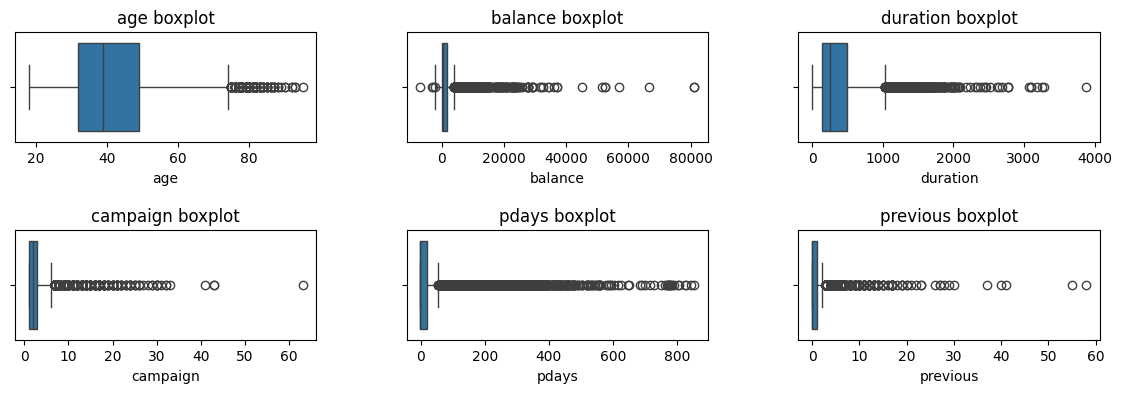

In [9]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.8, wspace=.3)

In [10]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

In [11]:
dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object

In [ ]:
num_cols = ["age","balance","duration","campaign","pdays","previous"]
cat_cols = ["job","marital","education",]

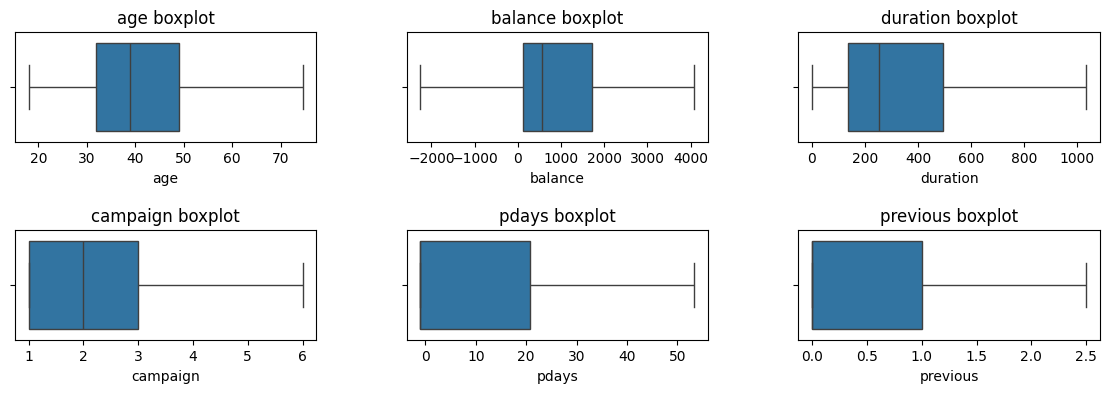

In [13]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col], orient="h" )
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.8, wspace=.3)

### 5- Visualization

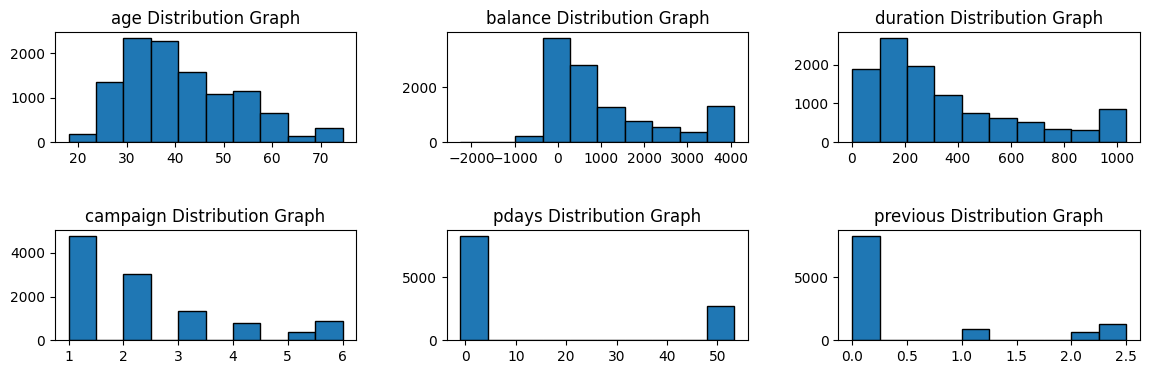

In [14]:
# Histogram
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()


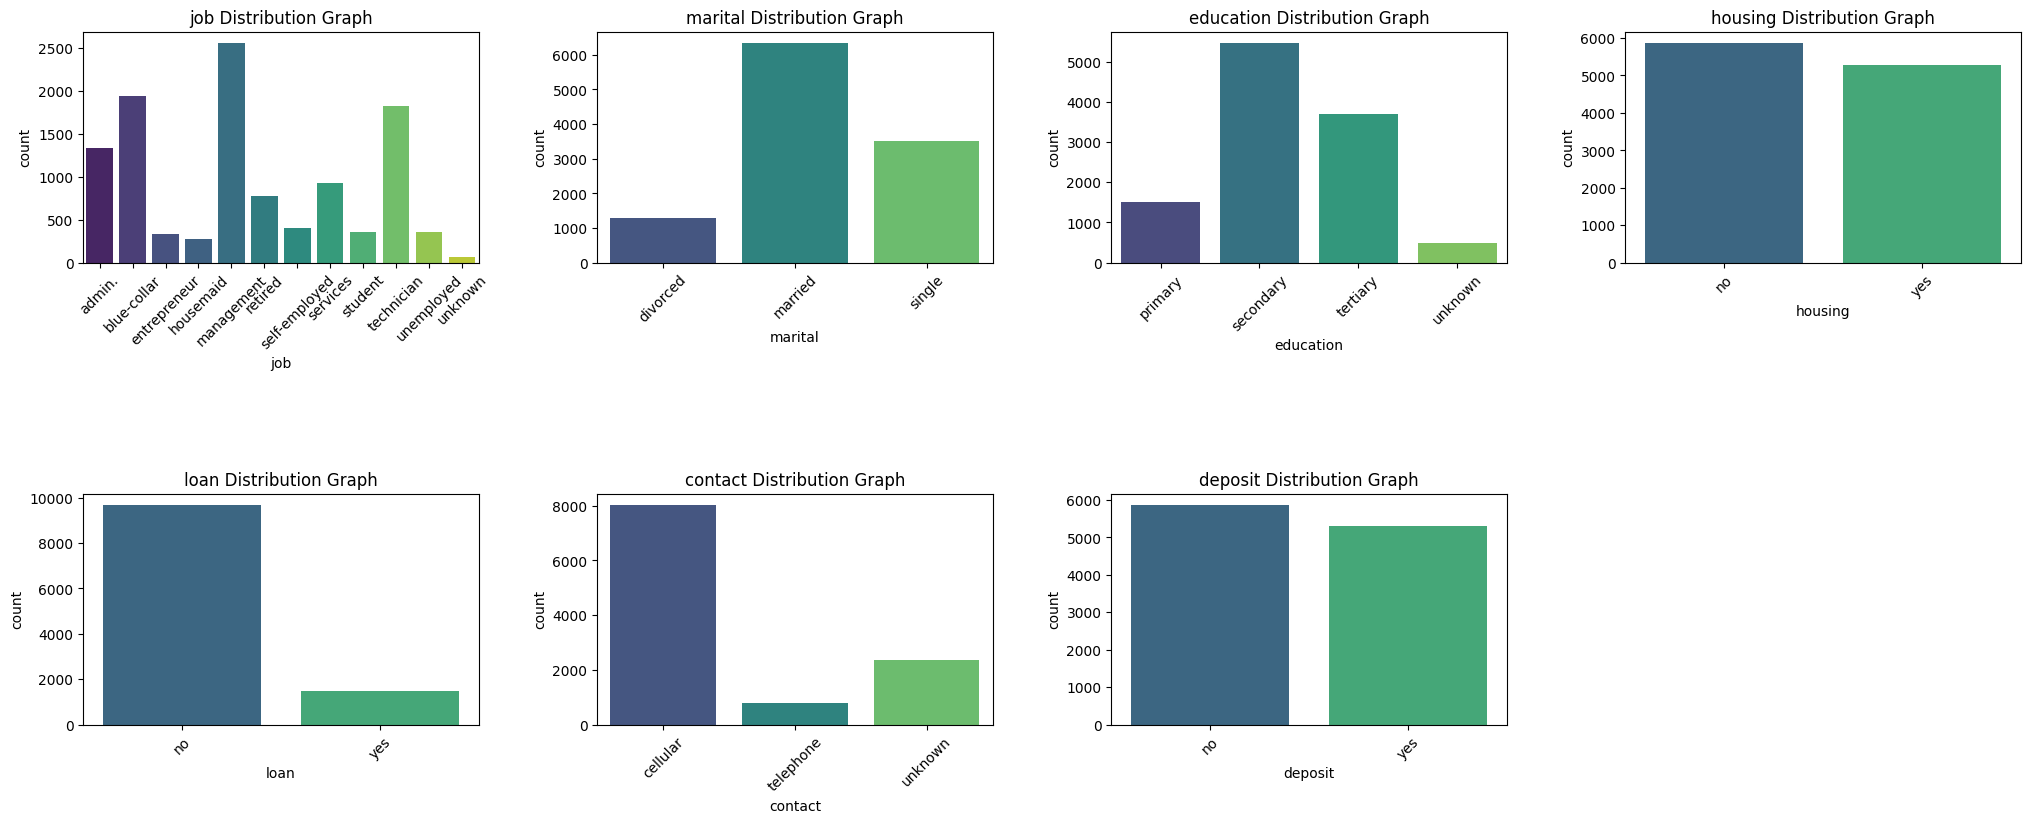

In [47]:
# Count Plot
cat_cols = df.select_dtypes(include=["object", "category"]).columns
plt.figure(figsize=(25, 15)) 

for i, col in enumerate(cat_cols):
    plt.subplot(3, 4, i+1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"{col} Distribution Graph")
    
    plt.xticks( rotation= 45) 

plt.subplots_adjust(hspace=1, wspace=0.3) 
plt.show()

### 6- Remove Duplicates 

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

### 7- Data Splitting

In [19]:
X = df.drop('deposit', axis=1)
y = df['deposit']

### 8- Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = X.select_dtypes("number").columns
scaler = MinMaxScaler()
 
X[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])
 

### 9- Encoding

In [49]:
str_cols = ["marital"]
pd.DataFrame(X[str_cols].nunique()).T

,marital
0,3


In [50]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)

In [51]:
X

,age,job,marital_1,marital_2,marital_3,education,balance,housing,loan,contact,duration,campaign,pdays,previous
0,0.725664,admin.,1,0,0,secondary,0.725095,yes,no,unknown,1.000000,0.0,0.0,0.0
1,0.672566,admin.,1,0,0,secondary,0.362863,no,no,unknown,1.000000,0.0,0.0,0.0
2,0.407080,technician,1,0,0,secondary,0.555958,yes,no,unknown,1.000000,0.0,0.0,0.0
3,0.654867,services,1,0,0,secondary,0.746059,yes,no,unknown,0.559651,0.0,0.0,0.0
4,0.637168,admin.,1,0,0,tertiary,0.384773,no,no,unknown,0.650824,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.265487,blue-collar,0,1,0,primary,0.355927,yes,no,cellular,0.247333,0.0,0.0,0.0
11158,0.371681,services,1,0,0,secondary,0.471311,no,no,unknown,0.078565,0.6,0.0,0.0
11159,0.247788,technician,0,1,0,secondary,0.360340,no,no,cellular,0.149370,0.2,0.0,0.0
11160,0.442478,technician,1,0,0,secondary,0.355769,no,yes,cellular,0.006790,0.2,1.0,1.0
